F_Ciff = 1 - r =  0.9993802583404648
A =  0.999199224754559
B =  1.5138803762525906e-10


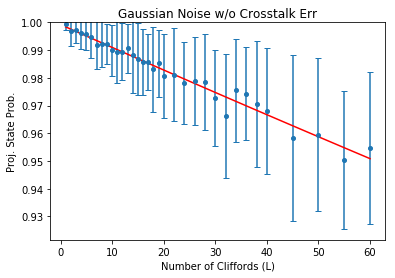

In [4]:
import pickle
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

with open('2q_RB_simu_L.pkl', 'rb') as f:
    x = pickle.load(f)
f.close()

with open('2q_RB_simu_y.pkl', 'rb') as f:
    y = pickle.load(f)
f.close()

with open('2q_RB_simu_yerr.pkl', 'rb') as f:
    yerr = pickle.load(f)
f.close()

# Fitting function
def func(x, A, B, r):
    return A * (1 - 4 / 3 * r) ** x + B

# def func(x, A):
#     return  * (1 - 4/3*0.053)**x + 0.25

popt, pcov = curve_fit(func, x, y, p0=[1, 0, 0], bounds=(0, 1), maxfev=5000)
# p0 is the guess of the parameters. Guess B ~ 0 (ideally be 0.25) and r ~ 0 (no noise model now so r should be ultra low)
print("F_Ciff = 1 - r = ", 1 - popt[2])
print("A = ", popt[0])
print("B = ", popt[1])

plt.errorbar(x, y, yerr=yerr, fmt='o', markersize=4, capsize=3)
plt.plot(x, func(x, *popt), 'r-')
# plt.plot(x, func(x, 0.75, 0.25, 0.053), 'b-')
plt.ylim(top=1.0)
plt.xlabel("Number of Cliffords (L)")
plt.ylabel("Proj. State Prob.")
# plt.title("Two-qubit RB Fitting")
plt.title("Gaussian Noise w/o Crosstalk Err")
plt.show()